# MACHINE LEARNING: REGRESSION - PREDICTING ENERGY EFFICIENCY OF BUILDINGS

Dataset Description
The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

## Load the data

In [2]:
data = pd.read_csv('energydata.csv')

## Show all the columns

In [3]:
pd.set_option('display.max_columns', None)

## Some E.D.A.s

In [4]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [6]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
data.shape

(19735, 29)

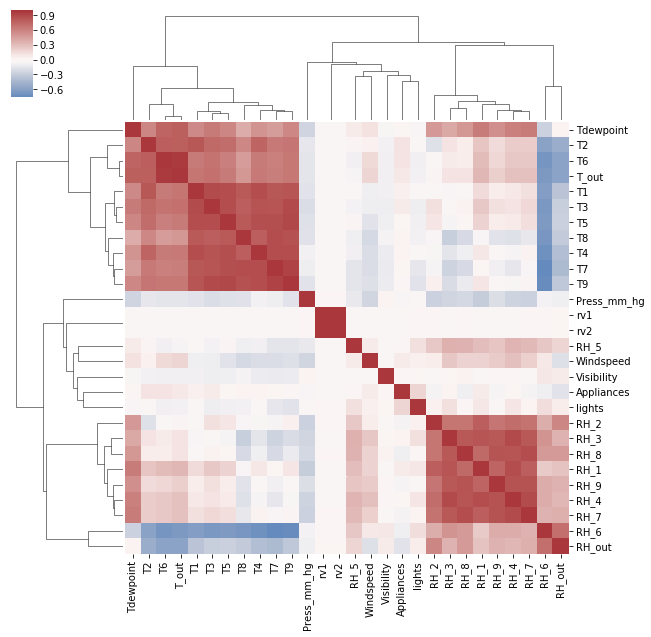

In [8]:
sns.clustermap(data.corr(), center = 0, cmap = 'vlag')

In [9]:
data.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [10]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Question 12

In [11]:
lin_model = LinearRegression()

X = data['T2'].to_numpy()
y = data['T6'].to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

lin_model.fit(Xtrain, ytrain)
ypred = lin_model.predict(Xtest)

print('The R-squared value = {}'.format(np.round(r2_score(ytest, ypred), 2)))

The R-squared value = 0.64


Text(0.5, 1.0, 'R2:0.64')

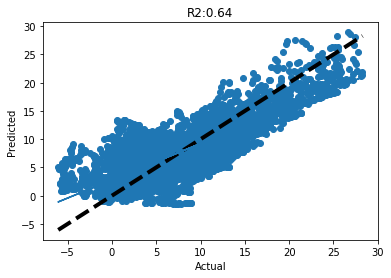

In [12]:
fig, ax = plt.subplots()
ax.scatter(ytest, ypred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.plot(ytest, lin_model.fit(ytest, ypred).predict(ytest))
ax.set_title('R2:{}'.format(np.round(r2_score(ytest, ypred), 2)))

## Question 13

In [13]:
scaler = MinMaxScaler()

data = data.drop(['date', 'lights'], axis = 1)

normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features_df = normalised_df.drop(columns=['Appliances'])
target_df = normalised_df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.3, random_state=42)

lin_model.fit(X_train, y_train)

predicted_values = lin_model.predict(X_test)

print('The Mean Absolute Error = {}'.format(np.round(mean_absolute_error(y_test, predicted_values), 2)))

The Mean Absolute Error = 0.05


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Question 14

In [14]:
print('The Residual Sum of Squares = {}'.format(np.round(np.sum(np.square(y_test - predicted_values)), 2)))

The Residual Sum of Squares = 45.35


## Question 15

In [15]:
print('The Root Mean Squared Error = {}'.format(np.round(np.sqrt(mean_squared_error(y_test, predicted_values)), 3)))

The Root Mean Squared Error = 0.088


## Question 16

In [16]:
print('The Coefficient of determination = {}'.format(np.round(r2_score(y_test, predicted_values), 2)))

The Coefficient of determination = 0.15


## Question 17

In [17]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(lin_model, X_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,rv2,-6.347156e+10
1,RH_2,-4.566222e-01
2,T_out,-3.218423e-01
3,T2,-2.361131e-01
4,T9,-1.899177e-01
5,RH_8,-1.575747e-01
6,RH_out,-7.767868e-02
7,RH_7,-4.462568e-02
8,RH_9,-3.980029e-02
9,T5,-1.566246e-02


## Question 18

In [18]:
ridge = Ridge(alpha = 0.4)

ridge.fit(X_train, y_train)
predict1 = ridge.predict(X_train)

print('The first Mean Squared Error = {}'.format(np.round(np.sqrt(mean_squared_error(y_train, predict1)), 2)))

The first Mean Squared Error = 0.09


In [19]:
ridge.fit(X_test, y_test)
predict2 = ridge.predict(X_test)

print('The second Mean Squared Error = {}'.format(np.round(np.sqrt(mean_squared_error(y_test, predict2)), 2)))

The second Mean Squared Error = 0.09


In [20]:
if np.round(np.sqrt(mean_squared_error(y_train, predict1))) == np.round(np.sqrt(mean_squared_error(y_test, predict2))):
    print('No change')
else:
    print('There is a change')

No change


#### There is no change in both RMSE

## Question 19

In [21]:
lasso = Lasso(alpha = 0.001)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
lasso_weights_df = get_weights_df(lasso, X_train, 'Lasso_weight')

lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [23]:
lasso_weights_df[lasso_weights_df['Lasso_weight'] != 0]

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
24,Windspeed,0.002912
25,RH_1,0.017880


#### RH_out, RH_8, Windspeed, RH_1 are the four features with non-zero feature weights.

## Question 20

In [24]:
lasso_pred = lasso.predict(X_test)

print(np.round(np.sqrt(mean_squared_error(y_test, lasso_pred)), 3))

0.094


## Summary

The RMSE remains unchanged for the train and test data using Ridge model with an hyper-parameter of alpha = 0.4.

Out of the 26 features that were trained with Lasso model, 22 of them have a zero feature weight.

The Linear regression model has a MAE of 0.05, RMSE of 0.088, CoD of 0.15 and RSS of 45.35.

The data had to be transformed using the MinMaxScaler for all these to be obtained.